titulo

In [4]:
#basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir('D:/projects/earthquakes')


In [5]:
pob = pd.read_csv('D:/projects/earthquakes/data/pob.csv')

In [3]:
pob.head()

,ubigeo_reniec,ubigeo_inei,Departamento,Provincia,Distrito,Edad_Anio,Sexo,Cantidad
0,21406,21910,ANCASH,SIHUAS,SICSIBAMBA,6,M,9
1,21406,21910,ANCASH,SIHUAS,SICSIBAMBA,65-69,F,23
2,21406,21910,ANCASH,SIHUAS,SICSIBAMBA,65-69,M,25
3,21406,21910,ANCASH,SIHUAS,SICSIBAMBA,60-64,F,40
4,21406,21910,ANCASH,SIHUAS,SICSIBAMBA,60-64,M,30


In [4]:
pob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123684 entries, 0 to 123683
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ubigeo_reniec  123684 non-null  int64 
 1   ubigeo_inei    123684 non-null  int64 
 2   Departamento   123684 non-null  object
 3   Provincia      123684 non-null  object
 4   Distrito       123684 non-null  object
 5   Edad_Anio      123684 non-null  object
 6   Sexo           123684 non-null  object
 7   Cantidad       123684 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 7.5+ MB


In [6]:
df = pob.groupby(['Departamento','Provincia','Distrito','ubigeo_inei'])['Cantidad'].sum().reset_index()


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Departamento  1874 non-null   object
 1   Provincia     1874 non-null   object
 2   Distrito      1874 non-null   object
 3   ubigeo_inei   1874 non-null   int64 
 4   Cantidad      1874 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#agregamos un cero y lo limitamos para que se una con el otro ubigeo
df['UBIGEO']= df.ubigeo_inei.apply(lambda x : str(x).zfill(6))

In [8]:
df = df[['UBIGEO','Cantidad']]
df['UBIGEO'] = df['UBIGEO'].astype(str).astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   UBIGEO    1874 non-null   int32
 1   Cantidad  1874 non-null   int64
dtypes: int32(1), int64(1)
memory usage: 22.1 KB


In [9]:
import geopandas as gpd

In [10]:
prov = gpd.read_file('D:/projects/earthquakes/data/sh/LIMITE_PROVINCIA/LIMITE_PROV.shp')
dist = gpd.read_file('D:/projects/earthquakes/data/sh/LIMITE_DISTRITO/LIMITE_DIST.shp')

de la base de pob el ubigeo_inei es la llave con la base dist UBIGEO pero esta tiene un 0 de mas

In [33]:
dist

,OBJECTID_1,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,UBIGEO,IDPROV,Shape_STAr,Shape_STLe,Shape_Leng,Shape_Area,geometry
0,1,15,LIMA,01,LIMA,38,SANTA MARIA DEL MAR,150138,1501,0.000649,0.156101,0.156101,0.000649,"MULTIPOLYGON (((-76.78182 -12.40919, -76.78173..."
1,2,15,LIMA,05,CAÑETE,05,CHILCA,150505,1505,0.040063,1.154549,1.154549,0.040063,"POLYGON ((-76.55171 -12.28024, -76.55021 -12.2..."
2,3,15,LIMA,01,LIMA,19,LURIN,150119,1501,0.015603,0.825145,0.820880,0.015595,"MULTIPOLYGON (((-76.70549 -12.17672, -76.70429..."
3,4,15,LIMA,01,LIMA,24,PUCUSANA,150124,1501,0.002562,0.437869,0.437869,0.002562,"MULTIPOLYGON (((-76.77367 -12.42553, -76.77332..."
4,5,15,LIMA,01,LIMA,26,PUNTA HERMOSA,150126,1501,0.010145,0.607714,0.607714,0.010145,"MULTIPOLYGON (((-76.65645 -12.18799, -76.65559..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,1870,20,PIURA,07,TALARA,01,PARIÑAS,200701,2007,0.091179,1.664519,1.664519,0.091179,"POLYGON ((-80.89458 -4.31752, -80.89412 -4.318..."
1870,1871,20,PIURA,06,SULLANA,02,BELLAVISTA,200602,2006,0.000189,0.061508,0.061508,0.000189,"POLYGON ((-80.66936 -4.88347, -80.66932 -4.883..."
1871,1872,20,PIURA,01,PIURA,15,VEINTISEIS DE OCTUBRE,200115,2001,0.005833,0.419652,0.419652,0.005833,"POLYGON ((-80.66118 -5.14968, -80.66102 -5.150..."
1872,1873,10,HUANUCO,06,LEONCIO PRADO,08,CASTILLO GRANDE,100608,1006,0.008583,0.533859,0.533859,0.008583,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."


In [11]:
dist = dist[['NOMBDEP','NOMBPROV','NOMBDIST','UBIGEO','geometry']]

In [35]:
dist.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   NOMBDEP   1874 non-null   object  
 1   NOMBPROV  1874 non-null   object  
 2   NOMBDIST  1874 non-null   object  
 3   UBIGEO    1874 non-null   object  
 4   geometry  1874 non-null   geometry
dtypes: geometry(1), object(4)
memory usage: 73.3+ KB


In [12]:
dist['UBIGEO'] = dist['UBIGEO'].astype(str).astype(int)


In [13]:
data = pd.merge(dist, df, how= 'left',on = 'UBIGEO')
data.to_csv('base.csv')

In [14]:
data.sort_values(by='Cantidad', ascending=False)

,NOMBDEP,NOMBPROV,NOMBDIST,UBIGEO,geometry,Cantidad
915,LIMA,LIMA,SAN JUAN DE LURIGANCHO,150132,"MULTIPOLYGON (((-77.03065 -11.99639, -77.03056...",1160109
896,LIMA,LIMA,SAN MARTIN DE PORRES,150135,"POLYGON ((-77.08499 -11.93760, -77.08485 -11.9...",744333
888,LIMA,LIMA,ATE,150103,"POLYGON ((-76.83689 -11.99370, -76.83517 -11.9...",669808
897,LIMA,LIMA,COMAS,150110,"POLYGON ((-77.04643 -11.89743, -77.04560 -11.8...",557997
894,LIMA,LIMA,VILLA EL SALVADOR,150142,"POLYGON ((-76.93980 -12.18648, -76.93945 -12.1...",492201
...,...,...,...,...,...,...
1420,AMAZONAS,CHACHAPOYAS,SONCHE,10121,"POLYGON ((-77.86135 -6.11924, -77.86133 -6.119...",221
1439,AMAZONAS,BONGARA,RECTA,10308,"POLYGON ((-77.79211 -5.89905, -77.79180 -5.899...",207
867,LIMA,YAUYOS,HUAMPARA,151013,"POLYGON ((-76.22344 -12.29909, -76.22260 -12.2...",200
272,TACNA,CANDARAVE,CURIBAYA,230204,"POLYGON ((-70.29981 -17.33536, -70.29947 -17.3...",187


<AxesSubplot:>

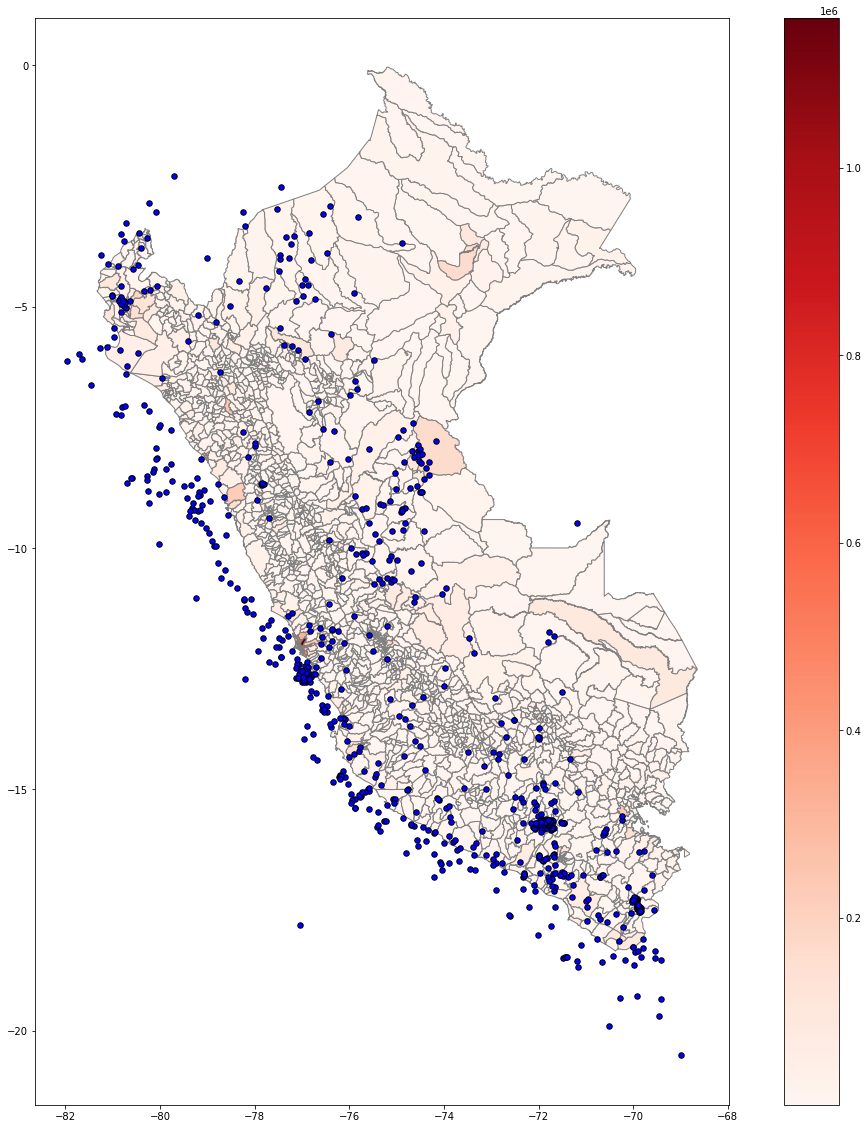

In [21]:
base = data.plot( column='Cantidad', cmap='Reds', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          legend = True )

sismos.plot(ax = base, color = 'blue', markersize=30, edgecolor='black')


In [16]:
sismos = gpd.read_file('D:/projects/earthquakes/data/Shp/Sismos_2021.shp')

In [52]:
sismos

,Fecha,Hora_UTC,Y,X,Profundida,Magnitud,geometry
0,2021/01/01,03:09:38.28,-15.6684,-73.8533,90.0,4.4,POINT (-73.85330 -15.66840)
1,2021/01/01,13:15:39.88,-8.2573,-79.7605,37.0,4.4,POINT (-79.76050 -8.25730)
2,2021/01/03,03:42:51.51,-16.2533,-73.7271,38.0,4.1,POINT (-73.72710 -16.25330)
3,2021/01/03,10:14:19.48,-7.2251,-80.9195,31.0,4.6,POINT (-80.91950 -7.22510)
4,2021/01/03,12:06:59.43,-15.8968,-74.2001,61.0,3.9,POINT (-74.20010 -15.89680)
...,...,...,...,...,...,...,...
829,2021/12/31,15:04:16.84,-12.6706,-76.9744,33.0,3.7,POINT (-76.97440 -12.67060)
830,2021/12/31,15:35:29.03,-8.0493,-74.4580,140.0,4.6,POINT (-74.45800 -8.04930)
831,2021/12/31,16:56:08.43,-14.9097,-75.3355,42.0,3.9,POINT (-75.33550 -14.90970)
832,2021/12/31,17:17:58.53,-5.5762,-76.3891,127.0,4.5,POINT (-76.38910 -5.57620)


In [17]:
import folium

In [20]:
m_2 = folium.Map(location=[35,136], tiles='cartodbpositron', zoom_start=5)

# Your code here: Add a map to visualize earthquake depth
def color_depth(val):
    if val < 50 :
        return 'forestgreen'
    elif val < 100:
        return 'darkorange'
    else:
        return 'darkred'
    
for i in range(0,len(sismos)):
    folium.Circle(
    location=[sismos.iloc[i]['Y'], sismos.iloc[i]['X']], radius = 2000, color = color_depth(sismos.iloc[i]['Profundida'])).add_to(m_2)
# Uncomment to see a hint
#q_2.a.hint()

# View the map
m_2